All the required packages are imported 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
import cv2
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Path of test and training data is obtained

In [3]:
TEST_DATADIR='/kaggle/input/gender-classification-dataset/Validation'
TRAIN_DATADIR='/kaggle/input/gender-classification-dataset/Training'
CATEGORIES = ["female", "male"]   # Class 0=female, Class 1=male


Function which extracts hog features of an image

In [4]:
def load_images(data_dir,t_images,t_labels):
    for category in CATEGORIES:  
        path = os.path.join(data_dir,category)
        class_num = CATEGORIES.index(category)
        image_cnt = 0
        for img in os.listdir(path):  
            if image_cnt > 3000:
                break
            image = cv2.imread(os.path.join(path,img))
            image = np.array(image).astype('uint8')
            image = cv2.resize(image, (64, 64))
            grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            hog_features, hog_images = hog(grey_image,
                                      visualize=True,
                                      block_norm='L2-Hys',
                                      pixels_per_cell=(16, 16))
            label=class_num
            t_images.append(hog_features)
            t_labels.append(label)
            image_cnt+=1



Transformation of the data 

In [5]:
def transformation(images,labels):
    images_array = np.array(images)
    labels_array = np.array(labels)
    labels_array = labels_array.astype(int)
    labels_array = labels_array.reshape((labels_array.size,1))
    images_df = np.concatenate([images_array, labels_array], axis = 1)
    return images_df[:,:-1],images_df[:,-1].ravel()

Performing the required operations on training data

In [6]:
train_images = []
train_labels = []
load_images(TRAIN_DATADIR,train_images,train_labels)
x_train,y_train=transformation(train_images,train_labels)

Performing the required operations on testing data

In [7]:
test_images = []
test_labels = []
load_images(TEST_DATADIR,test_images,test_labels)
x_test,y_test=transformation(test_images,test_labels)

Training the model

In [8]:
param_grid = {'kernel': ('linear', 'rbf'),'C': [1, 10, 100]}

In [9]:
base_estimator = SVC(gamma='scale')

In [10]:

svm = GridSearchCV(base_estimator, param_grid, cv=5)
svm.fit(x_train,y_train)
best_parameters = svm.best_params_
print(best_parameters)


{'C': 10, 'kernel': 'rbf'}


Finding the Accuracy of the model

In [11]:
y_pred = svm.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

Accuracy: 0.8713762079306898


Confusion matrix

In [12]:
label_names = [0, 1]
cmx = confusion_matrix(y_test, y_pred, labels=label_names)

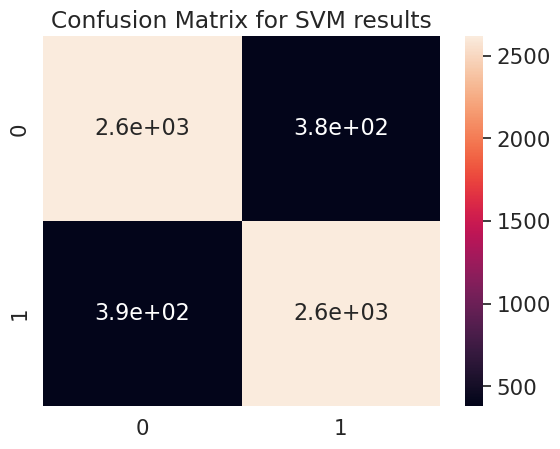

In [13]:
df_cm = pd.DataFrame(cmx)
sns.set(font_scale=1.4) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

Predicting the gender for a random image

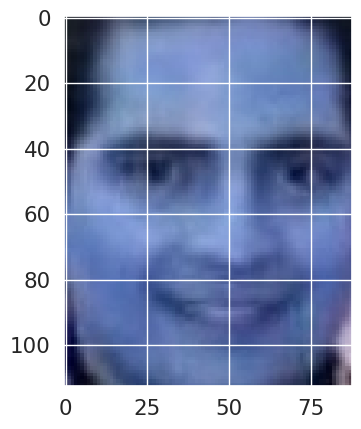

Your image was classified as a male


In [14]:
path='/kaggle/input/gender-classification-dataset/Validation/male/063443.jpg.jpg'
image = cv2.imread(path)
plt.imshow(image)
plt.show()
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hog_features, hog_images = hog(grey_image,
                                      visualize=True,
                                      block_norm='L2-Hys',
                                      pixels_per_cell=(16, 16))
image_array = np.array(hog_features)
image_array = image_array.reshape(1, -1)
svm_pred = svm.predict(image_array)
print('Your image was classified as a ' + str(CATEGORIES[int(svm_pred[0])]))

